# Predictive Methods for Gearbox Health Assessment using Machine Learning

## Dataset :-

#### Dataset for the training and testing is taken from Kiln-1 Log sheets from previous three months. Log sheets contain huge amount of data so we reduced the log sheet data into a three column dataset which contains Master Motor Load, Slave Motor Load and Breakdown.




#### 0 - No Breakdown
#### 1 - Breakdown

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading Dataset

In [2]:
data = pd.read_csv("D2.csv")

In [3]:
data.head()

,Master Motor Load,Slave Motor Load,Breakdown
0,142,140,0
1,161,159,0
2,162,168,0
3,151,148,0
4,154,151,0


In [4]:
data.shape

(2356, 3)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Master Motor Load  2356 non-null   int64
 1   Slave Motor Load   2356 non-null   int64
 2   Breakdown          2356 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [6]:
data.describe()

,Master Motor Load,Slave Motor Load,Breakdown
count,2356.000000,2356.000000,2356.0
mean,156.115025,151.862054,0.0
std,71.451252,71.109849,0.0
min,0.000000,0.000000,0.0
25%,142.000000,138.000000,0.0
50%,156.000000,152.000000,0.0
75%,173.000000,168.000000,0.0
max,400.000000,398.000000,0.0


In [7]:
data.sample(10)

,Master Motor Load,Slave Motor Load,Breakdown
1342,0,341,0
1155,157,152,0
174,134,126,0
862,174,168,0
163,147,142,0
2027,125,119,0
513,132,152,0
1021,148,137,0
2232,356,0,0
1416,183,175,0


## We only have data for Non-Breakdown cases so we have to generate synthetic data for Breakdown cases we do it as shown below

In [8]:
num_breakdowns = 1200
num_breakdowns_two = 250

synthetic_data_one = pd.DataFrame({
    'Master Motor Load': np.random.randint(185, 260, num_breakdowns),
    'Slave Motor Load': np.random.randint(185, 260, num_breakdowns),
    'Breakdown': np.ones(num_breakdowns, dtype=int)
})

synthetic_data_two = pd.DataFrame({
    'Master Motor Load': np.random.randint(385, 395, num_breakdowns),
    'Slave Motor Load': np.zeros(num_breakdowns),
    'Breakdown': np.ones(num_breakdowns, dtype=int)
})

synthetic_data_three = pd.DataFrame({
    'Master Motor Load': np.zeros(num_breakdowns),
    'Slave Motor Load': np.random.randint(385, 395, num_breakdowns),
    'Breakdown': np.ones(num_breakdowns, dtype=int)
})

synthetic_data_four = pd.DataFrame({
    'Master Motor Load': np.random.randint(195, 230, num_breakdowns_two),
    'Slave Motor Load': np.random.randint(155, 185, num_breakdowns_two),
    'Breakdown': np.zeros(num_breakdowns_two, dtype=int)
})

synthetic_data_five = pd.DataFrame({
    'Master Motor Load': np.random.randint(155, 185, num_breakdowns_two),
    'Slave Motor Load': np.random.randint(195, 230, num_breakdowns_two),
    'Breakdown': np.zeros(num_breakdowns_two, dtype=int)
})

In [9]:
synthetic_data_one.head()

,Master Motor Load,Slave Motor Load,Breakdown
0,191,232,1
1,213,194,1
2,218,219,1
3,202,208,1
4,244,195,1


In [10]:
synthetic_data_two.head()

,Master Motor Load,Slave Motor Load,Breakdown
0,385,0.0,1
1,394,0.0,1
2,390,0.0,1
3,388,0.0,1
4,394,0.0,1


In [11]:
synthetic_data_three.head()

,Master Motor Load,Slave Motor Load,Breakdown
0,0.0,392,1
1,0.0,392,1
2,0.0,390,1
3,0.0,391,1
4,0.0,392,1


## Making Final dataset by concatinating both actual data and synthetic data.

In [12]:
final_data = pd.concat([data,synthetic_data_one,synthetic_data_two,synthetic_data_three ,synthetic_data_four,synthetic_data_five ], axis =0)

In [13]:
final_data.shape

(6456, 3)

In [14]:
final_data.head()

,Master Motor Load,Slave Motor Load,Breakdown
0,142.0,140.0,0
1,161.0,159.0,0
2,162.0,168.0,0
3,151.0,148.0,0
4,154.0,151.0,0


In [15]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6456 entries, 0 to 249
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Master Motor Load  6456 non-null   float64
 1   Slave Motor Load   6456 non-null   float64
 2   Breakdown          6456 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 201.8 KB


In [16]:
final_data.describe()

,Master Motor Load,Slave Motor Load,Breakdown
count,6456.000000,6456.000000,6456.000000
mean,185.324814,183.589994,0.557621
std,129.141664,129.459144,0.496707
min,0.000000,0.000000,0.000000
25%,132.000000,128.000000,0.000000
50%,176.000000,172.000000,1.000000
75%,246.000000,244.000000,1.000000
max,400.000000,398.000000,1.000000


In [17]:
final_data.sample(10)

,Master Motor Load,Slave Motor Load,Breakdown
167,182.0,227.0,0
398,143.0,140.0,0
150,206.0,219.0,1
2040,153.0,148.0,0
230,183.0,228.0,0
629,0.0,390.0,1
904,234.0,219.0,1
56,392.0,0.0,1
806,387.0,0.0,1
103,135.0,120.0,0


## Data Visualization

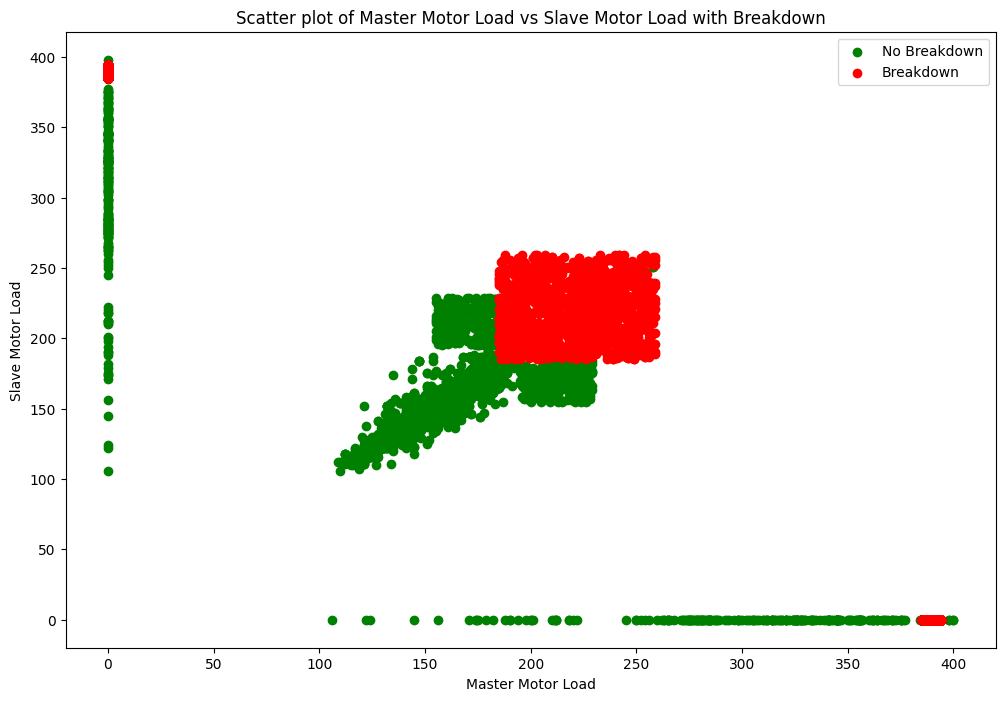

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

df_0 = final_data[final_data['Breakdown'] == 0]
df_1 = final_data[final_data['Breakdown'] == 1]

# Plot the data
plt.figure(figsize=(12, 8))

plt.scatter(df_0['Master Motor Load'], df_0['Slave Motor Load'], color='green', label='No Breakdown')
plt.scatter(df_1['Master Motor Load'], df_1['Slave Motor Load'], color='red', label='Breakdown')

plt.xlabel('Master Motor Load')
plt.ylabel('Slave Motor Load')
plt.title('Scatter plot of Master Motor Load vs Slave Motor Load with Breakdown')
plt.legend()
plt.show()

<Axes: xlabel='Master Motor Load', ylabel='Count'>

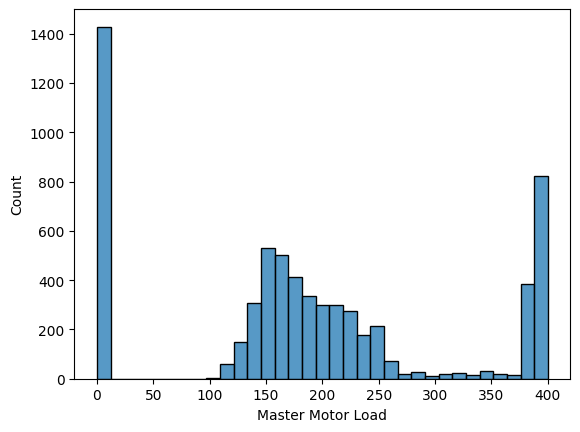

In [19]:
sns.histplot(final_data['Master Motor Load'])

<Axes: xlabel='Slave Motor Load', ylabel='Count'>

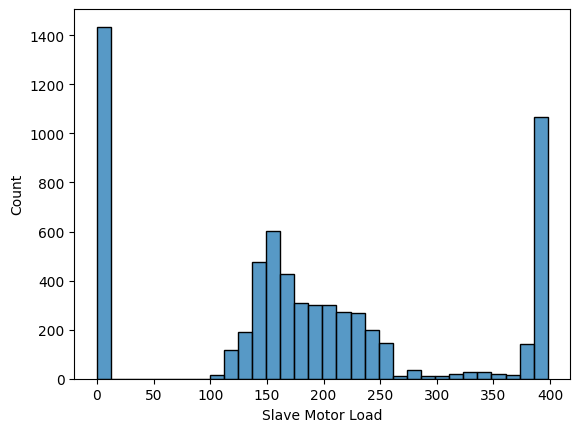

In [20]:
sns.histplot(final_data['Slave Motor Load'])

## Findig the correlation between each columns for prediction

<Axes: >

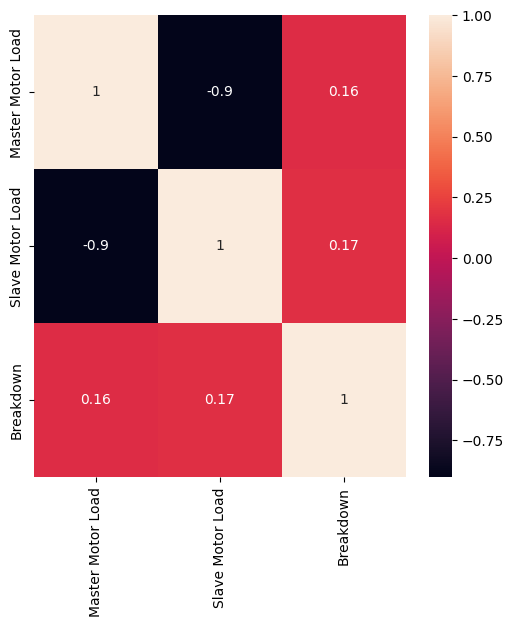

In [21]:
corr = final_data.corr()
plt.subplots(figsize=(6,6))
sns.heatmap(corr, annot=True)

## Splitting the dataset into training and testing parts

In [22]:
from sklearn.model_selection import train_test_split

x = final_data.drop('Breakdown', axis =1)
y = final_data['Breakdown']

In [23]:
x.shape

(6456, 2)

In [24]:
x

,Master Motor Load,Slave Motor Load
0,142.0,140.0
1,161.0,159.0
2,162.0,168.0
3,151.0,148.0
4,154.0,151.0
...,...,...
245,179.0,210.0
246,167.0,199.0
247,156.0,218.0
248,181.0,198.0


In [25]:
y

0      0
1      0
2      0
3      0
4      0
      ..
245    0
246    0
247    0
248    0
249    0
Name: Breakdown, Length: 6456, dtype: int64

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.3, random_state = 21)

In [27]:
x_train.shape

(4519, 2)

In [28]:
x_train.sample(10)

,Master Motor Load,Slave Motor Load
280,0.0,394.0
565,147.0,145.0
573,0.0,389.0
668,202.0,237.0
1161,221.0,214.0
1941,131.0,122.0
79,194.0,245.0
972,214.0,204.0
1545,174.0,166.0
920,189.0,235.0


## Defining a function for evaluating model

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# y_test - actual value of sample
# predicted value of sample

def evaluating_model(y_test, y_pred):
    print("Accuracy Score:- ", accuracy_score(y_test, y_pred))
    print("Precision Score:- ", precision_score(y_test, y_pred))
    print("Recall Score:- ", recall_score(y_test, y_pred))
    print("Confusion Matrix:- \n", confusion_matrix(y_test, y_pred))

## Model Building

## 1. LogisticRegression

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lgr = LogisticRegression(penalty='l2', solver='saga', max_iter=10000)
lgr_params = {
    'C': [0.01, 0.1, 1, 10, 100],
}

lgr_search = GridSearchCV(lgr, param_grid=lgr_params, cv=5, scoring='accuracy', n_jobs=-1, verbose=3)
lgr_search.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000, solver='saga'),
             n_jobs=-1, param_grid={'C': [0.01, 0.1, 1, 10, 100]},
             scoring='accuracy', verbose=3)

In [31]:
lgr_search.best_estimator_

LogisticRegression(C=100, max_iter=10000, solver='saga')

In [32]:
lgr_model = LogisticRegression(C=0.1, max_iter=10000, solver='saga')
lgr_model.fit(x_train, y_train)

lgr_pred = lgr_model.predict(x_test)
evaluating_model(y_test, lgr_pred)

Accuracy Score:-  0.8750645327826536
Precision Score:-  0.8156892612338157
Recall Score:-  1.0
Confusion Matrix:- 
 [[ 624  242]
 [   0 1071]]


## 2. Naive-Bayes (Gaussian)

In [33]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb_params = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  # Smoothing parameter
}
nb_search = GridSearchCV(nb, param_grid=nb_params, cv=5, scoring='accuracy', n_jobs=-1, verbose=3)
nb_search.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]},
             scoring='accuracy', verbose=3)

In [34]:
nb_search.best_estimator_

GaussianNB()

In [35]:
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

nb_pred = nb_model.predict(x_test)
evaluating_model(y_test, nb_pred)

Accuracy Score:-  0.748580278781621
Precision Score:-  0.8266219239373602
Recall Score:-  0.6900093370681606
Confusion Matrix:- 
 [[711 155]
 [332 739]]


## 3. Support Vector Machine

In [36]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc_params = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

svc_search = GridSearchCV( SVC(), svc_params, refit = True)
svc_search.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [37]:
svc_search.best_estimator_

SVC(C=100, gamma=0.001)

In [38]:
svc_model = SVC(C=1000, gamma=0.0001)
svc_model.fit(x_train, y_train)

svc_pred = svc_model.predict(x_test)
evaluating_model(y_test, svc_pred)

Accuracy Score:-  0.9948373773877129
Precision Score:-  0.994408201304753
Recall Score:-  0.996265172735761
Confusion Matrix:- 
 [[ 860    6]
 [   4 1067]]


## 4. Decision Tree Classifier

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

def randomized_search_ds(params, runs=20, clf=DecisionTreeClassifier(random_state=2)):
    rand_clf = RandomizedSearchCV(clf, params, n_iter=runs, cv=5, n_jobs=-1, random_state=2)
    rand_clf.fit(x_train, y_train)
    best_model = rand_clf.best_estimator_

    y_pred = best_model.predict(x_test)

    return best_model

randomized_search_ds(params={
    'criterion': ['entropy', 'gini'],
    'splitter': ['random', 'best'],
    'min_weight_fraction_leaf': [0.0, 0.0025, 0.005, 0.0075, 0.01],
    'min_samples_split': [2, 3, 4, 5, 6, 8, 10],
    'min_samples_leaf': [1, 0.01, 0.02, 0.03, 0.04],
    'min_impurity_decrease': [0.0, 0.0005, 0.005, 0.05, 0.10, 0.15, 0.2],
    'max_leaf_nodes': [10, 15, 20, 25, 30, 35, 40, 45, 50, None],
    'max_features': ['sqrt', 'log2', 0.95, 0.90, 0.85, 0.80, 0.75, 0.70],
    'max_depth': [None, 2, 4, 6, 8],
    'min_weight_fraction_leaf': [0.0, 0.0025, 0.005, 0.0075, 0.01, 0.05]
})


DecisionTreeClassifier(max_depth=8, max_features=0.7,
                       min_impurity_decrease=0.0005, min_samples_leaf=0.02,
                       min_samples_split=3, min_weight_fraction_leaf=0.0025,
                       random_state=2)

In [40]:
ds_clf = DecisionTreeClassifier(max_depth=8, max_features=0.7,
                       min_impurity_decrease=0.0005, min_samples_leaf=0.02,
                       min_samples_split=3, min_weight_fraction_leaf=0.0025,
                       random_state=2)
ds_clf.fit(x_train, y_train)


ds_pred = ds_clf.predict(x_test)
evaluating_model(y_test, ds_pred)

Accuracy Score:-  0.9793495095508519
Precision Score:-  0.963996399639964
Recall Score:-  1.0
Confusion Matrix:- 
 [[ 826   40]
 [   0 1071]]


## 5. Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier

def randomized_search_rf(params, runs=20, clf=RandomForestClassifier(random_state=2)):
    rand_clf = RandomizedSearchCV(clf, params, n_iter=runs, cv=5, n_jobs=-1, random_state=2)
    rand_clf.fit(x_train, y_train)
    best_model = rand_clf.best_estimator_

    y_pred = best_model.predict(x_test)

    return best_model

randomized_search_rf(params={
    'min_samples_leaf': [1, 2, 4, 6, 8, 10, 20, 30],
    'min_impurity_decrease': [0.0, 0.01, 0.05, 0.10, 0.15, 0.2],
    'max_features': ['sqrt', 'log2', 0.8, 0.7, 0.6, 0.5, 0.4],
    'max_depth': [None, 2, 4, 6, 8, 10, 20],
})

RandomForestClassifier(max_features='log2', min_samples_leaf=6, random_state=2)

In [42]:
rf_clf = RandomForestClassifier(max_features='log2', min_samples_leaf=6, random_state=2)
rf_clf.fit(x_train, y_train)
pred5 = rf_clf.predict(x_test)
evaluating_model(y_test, pred5)

Accuracy Score:-  0.9958699019101703
Precision Score:-  0.9953401677539608
Recall Score:-  0.9971988795518207
Confusion Matrix:- 
 [[ 861    5]
 [   3 1068]]


## 6. XG Boost Classifier

In [43]:
from xgboost import XGBClassifier

def randomized_search_xgboost(params, runs=20, clf=XGBClassifier(random_state=2)):
    rand_clf = RandomizedSearchCV(clf, params, n_iter=runs, cv=5, n_jobs=-1, random_state=2)
    rand_clf.fit(x_train, y_train)
    best_model = rand_clf.best_estimator_

    y_pred = best_model.predict(x_test)

    return best_model

randomized_search_xgboost(params= {
    'learning_rate': [0.05, 0.1, 0.2, 0.3],
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 4, 5, 6, 7],
    'min_child_weight': [1, 2, 3, 4],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0, 0.1, 0.5, 1],
    'scale_pos_weight': [1, 2, 3]
})

C:\Users\kandu\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=2, ...)

In [44]:
xgboost_classifier = XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=3, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=2)

xgboost_classifier.fit(x_train, y_train)
xgboost_pred = xgboost_classifier.predict(x_test)
evaluating_model(y_test, xgboost_pred)

Accuracy Score:-  0.996386164171399
Precision Score:-  0.9953445065176909
Recall Score:-  0.9981325863678805
Confusion Matrix:- 
 [[ 861    5]
 [   2 1069]]


In [45]:
xgboost_classifier.predict(np.array([230, 170 ]).reshape(1,2))

array([0])

In [46]:
'''
model building

export using pickle

build flask layer

deploy on a server 

PLC update, advanced

build an GUI - take output from server
'''

'\nmodel building\n\nexport using pickle\n\nbuild flask layer\n\ndeploy on a server \n\nPLC update, advanced\n\nbuild an GUI - take output from server\n'

In [47]:
best_model =  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=3, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=2)
best_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=2, ...)

In [48]:
import pickle
pickle.dump(best_model, open('model.pkl','wb'))